In [28]:
# KNN Classification
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [7]:
df=pd.read_csv('Zoo.csv')
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [29]:
le=LabelEncoder()
df['animal name']=le.fit_transform(df['animal name'])

In [30]:
df[df.duplicated()]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


In [31]:
df=df.drop_duplicates()

In [32]:
df.isnull().sum()

,0
animal name,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0


In [33]:
array=df.values
X=array[:,1:17]
Y=array[:,17]

In [34]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [35]:

kfold = KFold(n_splits=10,random_state=7,shuffle=True)


In [37]:
model = KNeighborsClassifier(n_neighbors=20)
results = cross_val_score(model, X,Y, cv=kfold)
print(results.mean())

0.7627272727272727


In [40]:
#grid search for algorithm tuning
n_neighbors = np.array(range(1,41))
param_grid = dict(n_neighbors=n_neighbors)
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X,Y)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40])})

In [41]:
print(grid.best_score_)
print(grid.best_params_)

0.97
{'n_neighbors': np.int64(1)}


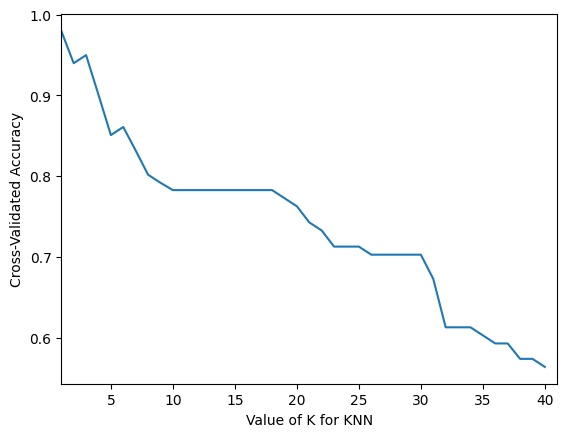

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    kfold=KFold(n_splits=10,random_state=7,shuffle=True)
    scores = cross_val_score(knn, X, Y, cv=kfold)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xlim(1,41)
plt.show()

In [43]:
best_k_val=k_scores.index(max(k_scores))
best_score=max(k_scores)
print(best_k_val+1,best_score)

1 0.9800000000000001


In [44]:
knn = KNeighborsClassifier(n_neighbors=16)
kfold=KFold(n_splits=10,random_state=7,shuffle=True)
scores = cross_val_score(knn, X, Y, cv=kfold)
scores.mean()

np.float64(0.7827272727272728)

1. What are the key hyperparameters in KNN?

A.   The key hyperparameters in K-Nearest Neighbors (KNN) are:

1.n_neighbors – The number of neighbors to consider. Small values can cause overfitting; large values can cause underfitting.

2.weights – Determines how neighbors are weighted: 'uniform' (all equal) or 'distance' (closer neighbors weigh more).

3.metric – The distance metric used, e.g., 'euclidean', 'manhattan', or 'minkowski'.

4.p – Used with the Minkowski metric to set the distance order (p=1 for Manhattan, p=2 for Euclidean).

5.algorithm – Method to compute neighbors: 'auto', 'ball_tree', 'kd_tree', or 'brute'.

6.leaf_size – Size of leaves for tree algorithms, affecting query speed.

“Tuning these hyperparameters appropriately can balance bias and variance and improve model accuracy.”

2. What distance metrics can be used in KNN?

“KNN can use different distance metrics to measure similarity between points:

Euclidean distance – Straight-line distance, most common.

Manhattan distance – Sum of absolute differences.

Minkowski distance – Generalized form of Euclidean and Manhattan; controlled by p.

Chebyshev distance – Maximum difference along any dimension.

Hamming distance – Counts differing positions, useful for categorical or binary data.

Choosing the right distance metric depends on the type and scale of the data.”